In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('E:\\Datasets\\placement (1).csv')

df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

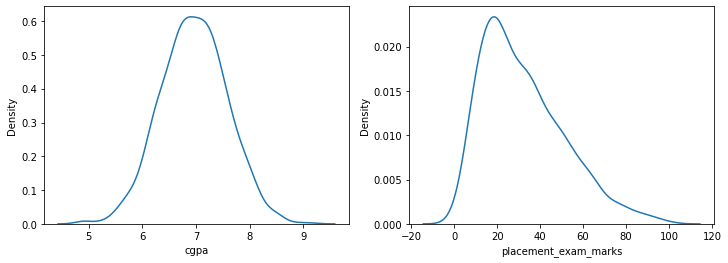

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

sns.distplot(df['cgpa'],hist=False)

plt.subplot(1,2,2)

sns.distplot(df['placement_exam_marks'],hist=False)

In [14]:
df['placement_exam_marks'].skew()

0.8356419499466834

C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

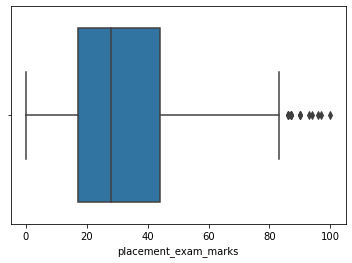

In [15]:
sns.boxplot(df.placement_exam_marks)

In [21]:
Q1 = df['placement_exam_marks'].quantile(.25)

Q3 = df['placement_exam_marks'].quantile(.75)

In [23]:
IQR = Q3 - Q1

In [24]:
IQR

27.0

In [27]:
lower_limit = Q1 - (1.5*IQR)

upper_limit = Q3 + (1.5*IQR)

print(lower_limit)
print(upper_limit)

-23.5
84.5


In [32]:
# Find outlier in our data

df[df['placement_exam_marks'] > upper_limit]



,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [33]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


## Trimming

In [48]:
trimmed_df = df[(df['placement_exam_marks'] < upper_limit) & (df['placement_exam_marks'] > lower_limit)]

In [49]:
trimmed_df.shape

(985, 3)

C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an ax

<AxesSubplot:xlabel='placement_exam_marks'>

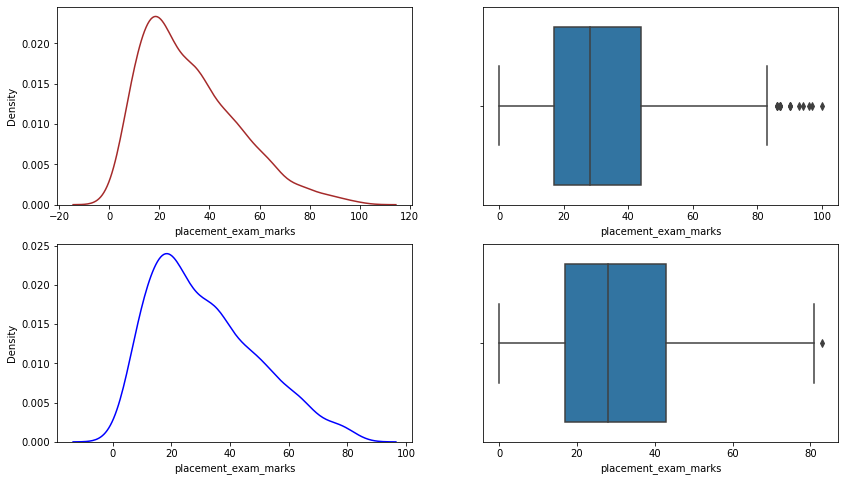

In [79]:
# Comparing original data and after removing outlier data

plt.figure(figsize = (14,8))

plt.subplot(2,2,1)

sns.distplot(df.placement_exam_marks,hist=False,color='brown')

plt.subplot(2,2,2)

sns.boxplot(df.placement_exam_marks)

plt.subplot(2,2,3)

sns.distplot(trimmed_df.placement_exam_marks,hist = False,color='blue')

plt.subplot(2,2,4)

sns.boxplot(trimmed_df.placement_exam_marks)

In [95]:
capped_df = df.copy()

capped_df['placement_exam_marks'] = np.where(

    capped_df.placement_exam_marks > upper_limit,
    
    upper_limit,
    
np.where(

    capped_df.placement_exam_marks < lower_limit,
    
    lower_limit,
    
    capped_df.placement_exam_marks
  
)

)

In [96]:
capped_df.shape

(1000, 3)

In [98]:
capped_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level

<AxesSubplot:xlabel='placement_exam_marks'>

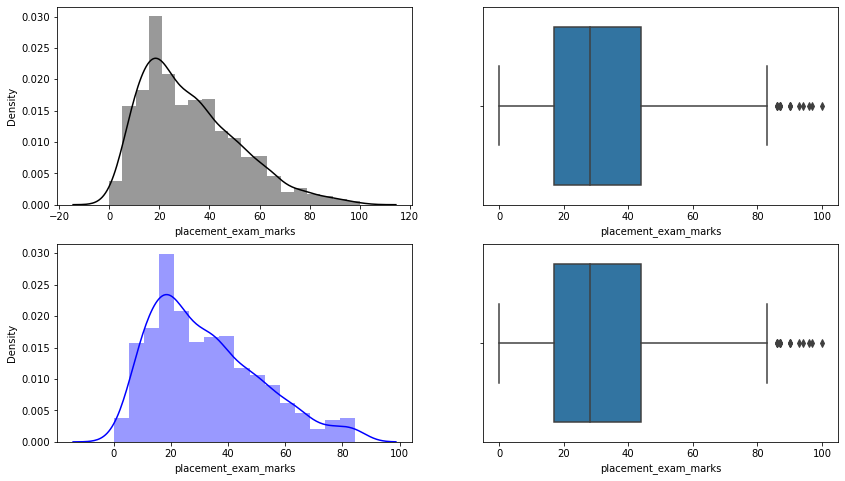

In [112]:
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)

sns.distplot(df['placement_exam_marks'],color = 'black')

plt.subplot(2,2,2)

sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)

sns.distplot(capped_df['placement_exam_marks'],color = 'blue')

plt.subplot(2,2,4)

sns.boxplot(df['placement_exam_marks'])